#**CREDIT CARD PREDICTION**

###**IMPORTS**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

###**CLEANING TRAIN DATA**

In [2]:
#I have attached my drive nad imported files from there change the path before executing it 
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analytics Vidya/train_s3TEQDk.csv")
train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [3]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [4]:
new_train = train.fillna('Yes')
new_train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [5]:
label = LabelEncoder()

In [6]:
new_train['Credit_Product_new'] = label.fit_transform(new_train['Credit_Product'])
new_train = new_train.drop("Credit_Product", axis = "columns")

new_train['Is_Active_new'] = label.fit_transform(new_train['Is_Active'])
new_train = new_train.drop("Is_Active", axis = "columns")

new_train['Channel_Code_new'] = label.fit_transform(new_train['Channel_Code'])
new_train = new_train.drop("Channel_Code", axis = "columns")

new_train['Occupation_new'] = label.fit_transform(new_train['Occupation'])
new_train = new_train.drop("Occupation", axis = "columns")

new_train['Gender_New'] = label.fit_transform(new_train['Gender'])
new_train = new_train.drop("Gender", axis = "columns")

new_train['Region_Code_New'] = label.fit_transform(new_train['Region_Code'])
new_train = new_train.drop("Region_Code", axis = "columns")

new_train.head()

,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,Credit_Product_new,Is_Active_new,Channel_Code_new,Occupation_new,Gender_New,Region_Code_New
0,NNVBBKZB,73,43,1045696,0,0,0,2,1,0,18
1,IDD62UNG,30,32,581988,0,0,0,0,2,0,27
2,HD3DSEMC,56,26,1484315,0,0,1,2,3,0,18
3,BF3NC7KV,34,19,470454,0,0,0,0,2,1,20
4,TEASRWXV,30,33,886787,0,0,0,0,2,0,32


In [7]:
input_train = new_train.drop(columns=['ID', 'Is_Lead'], axis =1)
input_train.head()

,Age,Vintage,Avg_Account_Balance,Credit_Product_new,Is_Active_new,Channel_Code_new,Occupation_new,Gender_New,Region_Code_New
0,73,43,1045696,0,0,2,1,0,18
1,30,32,581988,0,0,0,2,0,27
2,56,26,1484315,0,1,2,3,0,18
3,34,19,470454,0,0,0,2,1,20
4,30,33,886787,0,0,0,2,0,32


In [8]:
target = new_train['Is_Lead']
target

0         0
1         0
2         0
3         0
4         0
         ..
245720    0
245721    0
245722    0
245723    0
245724    0
Name: Is_Lead, Length: 245725, dtype: int64

###**CLEANING TEST DATA**

In [9]:
#I have attached my drive nad imported files from there change the path before executing it
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analytics Vidya/test_mSzZ8RL.csv")
test

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [10]:
test.shape

(105312, 10)

In [11]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [12]:
#new_test = test.dropna( how ='any')
#new_test = test.fillna(method='ffill')
new_test = test.fillna('Yes')
new_test.head()
print(new_test.isnull().sum())

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64


In [13]:
label1 = LabelEncoder()

In [14]:
new_test['Credit_Product_new'] = label1.fit_transform(new_test['Credit_Product'])
new_test = new_test.drop("Credit_Product", axis = "columns")

new_test['Is_Active_new'] = label1.fit_transform(new_test['Is_Active'])
new_test = new_test.drop("Is_Active", axis = "columns")

new_test['Channel_Code_new'] = label1.fit_transform(new_test['Channel_Code'])
new_test = new_test.drop("Channel_Code", axis = "columns")

new_test['Occupation_new'] = label1.fit_transform(new_test['Occupation'])
new_test = new_test.drop("Occupation", axis = "columns")

new_test['Gender_New'] = label1.fit_transform(new_test['Gender'])
new_test = new_test.drop("Gender", axis = "columns")

new_test['Region_Code_New'] = label1.fit_transform(new_test['Region_Code'])
new_test = new_test.drop("Region_Code", axis = "columns")

new_test.head()

,ID,Age,Vintage,Avg_Account_Balance,Credit_Product_new,Is_Active_new,Channel_Code_new,Occupation_new,Gender_New,Region_Code_New
0,VBENBARO,29,25,742366,1,0,0,1,1,4
1,CCMEWNKY,43,49,925537,1,0,1,1,1,18
2,VK3KGA9M,31,14,215949,0,0,0,2,1,20
3,TT8RPZVC,29,33,868070,0,0,0,1,1,22
4,SHQZEYTZ,29,19,657087,0,0,0,1,0,20


In [15]:
input_test = new_test.drop(columns=['ID'], axis =1)
input_test.head()

,Age,Vintage,Avg_Account_Balance,Credit_Product_new,Is_Active_new,Channel_Code_new,Occupation_new,Gender_New,Region_Code_New
0,29,25,742366,1,0,0,1,1,4
1,43,49,925537,1,0,1,1,1,18
2,31,14,215949,0,0,0,2,1,20
3,29,33,868070,0,0,0,1,1,22
4,29,19,657087,0,0,0,1,0,20


###**CREATING MODEL**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(input_train, target, test_size=0.3)

####**Random Forest**

In [ ]:
model = RandomForestClassifier(n_estimators = 500, n_jobs = -1,random_state =50, min_samples_leaf = 50)
model.fit(X_train, y_train)

acc = model.score(X_test, y_test)
print("Accuracy:", acc*100)

y_predicted = model.predict(X_test)
print("\nAUC - ROC : ", roc_auc_score(y_test, y_predicted))

Accuracy: 82.23364714181068

AUC - ROC :  0.7329834028078337


####**Decision Tree**

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

acc = model.score(X_test, y_test)
print("Accuracy:", acc*100)

y_predicted = model.predict(X_test)
print("\nAUC - ROC : ", roc_auc_score(y_test, y_predicted))

Accuracy: 75.10513036164845

AUC - ROC :  0.661581559215565


####**LGB Classifier**

In [18]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

acc = model.score(X_test, y_test)
print("Accuracy:", acc*100)

y_predicted = model.predict(X_test)
print("\nAUC - ROC : ", roc_auc_score(y_test, y_predicted))

Accuracy: 82.62568165169972

AUC - ROC :  0.734525969921788


####**XGBoost**

In [109]:
model = XGBClassifier(n_estimators=2000,tree_method='hist',subsample=0.67,colsample_level=0.06,verbose=0,n_jobs=6,random_state=1234)
model.fit(X_train, y_train)

acc = model.score(X_test, y_test)
print("Accuracy:", acc*100)

y_predicted = model.predict(X_test)
print("\nAUC - ROC : ", roc_auc_score(y_test, y_predicted))

Accuracy: 82.46154263544861

AUC - ROC :  0.7300877427480084


####**CatBoost**

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=5, learning_rate=0.5)
model.fit(X_train, y_train)

acc = model.score(X_test, y_test)
print("Accuracy:", acc*100)

y_predicted = model.predict(X_test)
print("\nAUC - ROC : ", roc_auc_score(y_test, y_predicted))

0:	learn: 0.5051804	total: 29ms	remaining: 116ms
1:	learn: 0.4427722	total: 55.7ms	remaining: 83.5ms
2:	learn: 0.4142409	total: 84.8ms	remaining: 56.6ms
3:	learn: 0.3983114	total: 114ms	remaining: 28.6ms
4:	learn: 0.3920343	total: 145ms	remaining: 0us
Accuracy: 82.10884722862801

AUC - ROC :  0.7368779891801558


####**Random Forest mutiple leaves**

In [ ]:
sample_leaf_options = [1,2,3,4,5,10,20,50]
for leaf_size in sample_leaf_options :
    model = RandomForestClassifier(n_estimators = 200, n_jobs = -1,random_state =50, min_samples_leaf = leaf_size)
    model.fit(X_train, y_train)
    print("\n Leaf size :", leaf_size)
    print("\AUC - ROC : ", roc_auc_score(y_test, model.predict(X_test)))


 Leaf size : 1
\AUC - ROC :  0.7102640300341666

 Leaf size : 2
\AUC - ROC :  0.7179031590551662

 Leaf size : 3
\AUC - ROC :  0.7222776775570241

 Leaf size : 4
\AUC - ROC :  0.7252987598909548

 Leaf size : 5
\AUC - ROC :  0.7259320718997038

 Leaf size : 10
\AUC - ROC :  0.7315646358783928

 Leaf size : 20
\AUC - ROC :  0.7320865355247372

 Leaf size : 50
\AUC - ROC :  0.7335562760676635


#### **Checking Accuracy**

In [19]:
acc = model.score(X_test, y_test)
print("Accuracy:", acc*100)

y_predicted = model.predict(X_test)
print("\nAUC - ROC : ", roc_auc_score(y_test, y_predicted))

Accuracy: 82.62568165169972

AUC - ROC :  0.734525969921788


####**Predicting the values**

In [110]:
prediction = model.predict(input_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

####**Confusion Matrix**

In [111]:
from sklearn.metrics import confusion_matrix

Text(33.0, 0.5, 'Truth')

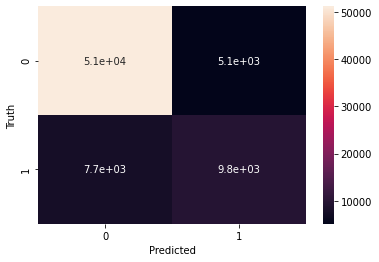

In [98]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

###**SAMPLE SUBMISSION CSV**

In [103]:
ID = new_test['ID']
data={'ID':ID, 'Is_Lead' : prediction}
data

{'ID': 0         VBENBARO
 1         CCMEWNKY
 2         VK3KGA9M
 3         TT8RPZVC
 4         SHQZEYTZ
             ...   
 105307    DBENJOYI
 105308    CWQ72DWS
 105309    HDESC8GU
 105310    2PW4SFCA
 105311    F2NOYPPZ
 Name: ID, Length: 105312, dtype: object,
 'Is_Lead': array([0, 0, 0, ..., 0, 0, 0])}

In [104]:
new_df = pd.DataFrame(data=data)
new_df

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,0
105310,2PW4SFCA,0


In [108]:
new_df.to_csv('sample_submission_RF.csv', index=False)
#/content/drive/MyDrive/Colab Notebooks/Analytics Vidya/

In [107]:
new_df.shape

(105312, 2)

**Done!**